In [ ]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

import os

import shutil

# Fine tuning with DIDA dataset

## Create train data

In [2]:
# Define paths
dataset_path = '../datasets/DIDA'
output_path = './train_tesseract/data/dida-ground-truth'

# Create data directory
os.makedirs(output_path, exist_ok=True)

# For each image, convert it to PNG and create a label file
for digit in range(10):
    print(f"Processing digit {digit}...")
    digit_path = os.path.join(dataset_path, str(digit))
    images = [os.path.join(digit_path, img) for img in os.listdir(digit_path) if img.endswith('.jpg')]
    
    for img in images:
        img_png = img.replace('.jpg', '.png')
        cv2.imwrite(os.path.join(output_path, f'{os.path.basename(img_png)}'), cv2.imread(img))

        label_file = img.replace('.jpg', '.gt.txt')
        label_path = os.path.join(output_path, os.path.basename(label_file))

        label = f"{digit}"

        with open(label_path, 'w') as f:
            f.write(label)
    print("Done.")

Processing digit 0...
Done.
Processing digit 1...
Done.
Processing digit 2...
Done.
Processing digit 3...
Done.
Processing digit 4...
Done.
Processing digit 5...
Done.
Processing digit 6...
Done.
Processing digit 7...
Done.
Processing digit 8...
Done.
Processing digit 9...
Done.


## Train model

Execute the following commands in the terminal:

```shell
cd .\train_tesseract\
make training MODEL_NAME=dida START_MODEL=digits_comma TESSDATA=./tessdata
```

In [ ]:
# Move the `dida.traineddata` file from `train_tesseract/data` to `train_tesseract/tessdata` folder.

shutil.move('./train_tesseract/data/dida.traineddata', './train_tesseract/tessdata/dida.traineddata')

'./train_tesseract/tessdata/dida.traineddata'

# Testing

In [12]:
image = cv2.imread("../images/Example05.png")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

tessdata_dir_config = r'--tessdata-dir ./train_tesseract/tessdata'
lang = 'dida'

text = pytesseract.image_to_string(image, lang=lang, config=tessdata_dir_config)
print(text)

5555 6
55 9
5 4 95
999 9

5 9 5
3 39491444
4 4 3 55 9
649 5 5464 9

1
959 595955 85995

48

9 5444655555
55 9 7 5 3

6 4 5 5 94 7 7 6 9 494
94

955 4055
4 9 99 59
5 5 55
5 55 1
5
5 5 9 5959
59 719504 5 4 73 7 4 9
49 97 8 5 5



In [13]:
h, w, _ = image.shape
boxes = pytesseract.image_to_boxes(rgb, lang=lang, config=tessdata_dir_config)
print(boxes)

5 197 1056 324 1092 0
5 314 1048 384 1100 0
5 328 1052 529 1096 0
5 465 1048 531 1100 0
6 533 1070 565 1089 0
5 248 1034 268 1049 0
5 272 1031 367 1062 0
9 600 996 724 1063 0
5 87 920 237 1057 0
4 223 1000 254 1048 0
9 309 961 450 1027 0
5 370 986 604 1063 0
9 405 917 493 953 0
9 500 933 537 958 0
9 538 933 600 959 0
9 608 887 863 1027 0
5 98 854 220 957 0
9 220 885 343 988 0
5 350 862 500 959 0
3 88 863 122 872 0
3 350 862 378 889 0
9 350 862 409 889 0
4 411 869 416 873 0
9 415 862 432 889 0
1 431 862 451 889 0
4 417 864 510 882 0
4 485 862 511 889 0
4 515 866 551 880 0
4 98 848 170 880 0
4 213 831 303 879 0
3 466 822 508 846 0
5 522 830 662 894 0
5 646 839 726 917 0
9 686 822 829 890 0
6 97 787 136 823 0
4 144 798 176 813 0
9 180 796 219 818 0
5 226 783 291 821 0
5 456 791 500 822 0
4 501 795 522 816 0
6 527 803 534 810 0
4 541 799 597 819 0
9 706 799 792 824 0
1 794 791 807 816 0
9 123 763 142 789 0
5 175 763 191 794 0
9 198 766 264 794 0
5 359 759 403 792 0
9 419 759 427 792 0
5 42

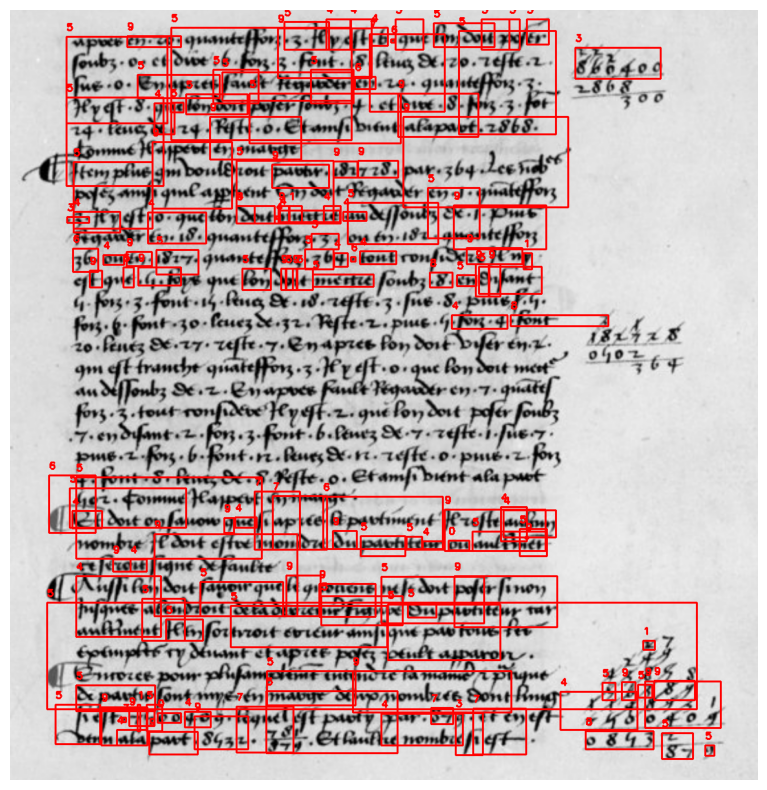

In [14]:
plt.figure(figsize=(10, 10))
for b in boxes.splitlines():
	b = b.split(" ")
	x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
	cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 0, 255), 2)
	cv2.putText(image, b[0], (x, h - y2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()